***KNN Regression***

In [584]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn. metrics import mean_absolute_error,mean_squared_error,median_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [585]:
df=pd.read_csv('../data/houses.csv')
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,22.19
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,53.80
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,18.00
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,60.40
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,51.00


In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       999 non-null    float64
 1   bathrooms      999 non-null    float64
 2   sqft_living    999 non-null    float64
 3   sqft_lot       999 non-null    float64
 4   floors         999 non-null    float64
 5   waterfront     999 non-null    float64
 6   view           999 non-null    float64
 7   condition      999 non-null    float64
 8   grade          999 non-null    float64
 9   sqft_above     999 non-null    float64
 10  sqft_basement  999 non-null    float64
 11  yr_built       999 non-null    float64
 12  yr_renovated   999 non-null    float64
 13  zipcode        999 non-null    float64
 14  lat            999 non-null    float64
 15  long           999 non-null    float64
 16  sqft_living15  999 non-null    float64
 17  price          999 non-null    float64
dtypes: float6

In [587]:
df.isna().sum()

bedrooms         1
bathrooms        1
sqft_living      1
sqft_lot         1
floors           1
waterfront       1
view             1
condition        1
grade            1
sqft_above       1
sqft_basement    1
yr_built         1
yr_renovated     1
zipcode          1
lat              1
long             1
sqft_living15    1
price            1
dtype: int64

In [588]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy='mean')
df=si.fit_transform(df.drop('price',axis=1))

In [589]:
x=df[ : , : -1]
y=df[: ,-1]

In [590]:
scale=StandardScaler()
X=scale.fit_transform(x)

In [591]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [592]:
model=KNeighborsRegressor(n_neighbors=10,weights='uniform',algorithm='kd_tree')

In [593]:
model.fit(x_train,y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=10)

In [594]:
model.score(x_train,y_train)

0.7458590225356552

In [595]:
model.score(x_test,y_test)

0.7457970913836145

In [596]:
pred_y=model.predict(x_test)

In [597]:
pred_y[:5]

array([1529., 1480., 2119., 2781., 2075.])

In [598]:
y_test[:5]

array([1020., 1810., 2120., 3740., 1480.])

In [599]:
print(f'MAE={mean_absolute_error(y_test,pred_y)}')
print(f'MSA={mean_squared_error(y_test,pred_y)}')
print(f'median AE={median_absolute_error(y_test,pred_y)}')

MAE=267.5005930930931
MSA=121650.09219513973
median AE=210.5


***KNN classification***

In [600]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,r2_score

In [601]:
cancer=load_breast_cancer()

In [602]:
feature=cancer.data
target=cancer.target

In [603]:
feature.shape

(569, 30)

In [604]:
model=KNeighborsClassifier(n_neighbors=7)

In [605]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=10)

In [606]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [607]:
model.score(x_train,y_train)

0.945054945054945

In [608]:
model.score(x_test,y_test)

0.9298245614035088

In [609]:
pred=model.predict(x_test)

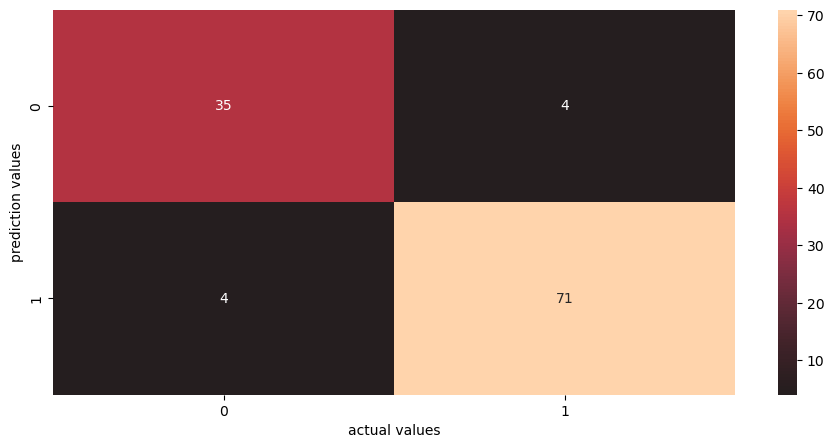

In [612]:
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(11,5))
sns.heatmap(cm,annot=True,center=True)
plt.xlabel('actual values')
plt.ylabel('prediction values')
plt.show()